In [1]:
import pandas as pd

#Species, Weight, Length, Diagonal, Height, Width
fish = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fish.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(119, 5) (40, 5) (119,) (40,)


In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#훈련 세트와 테스트 세트의 정확도가 낮음

0.773109243697479
0.775


c:\Users\rhkr3\anaconda3\envs\pandas_jm\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\rhkr3\anaconda3\envs\pandas_jm\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [7]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)


In [8]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

c:\Users\rhkr3\anaconda3\envs\pandas_jm\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


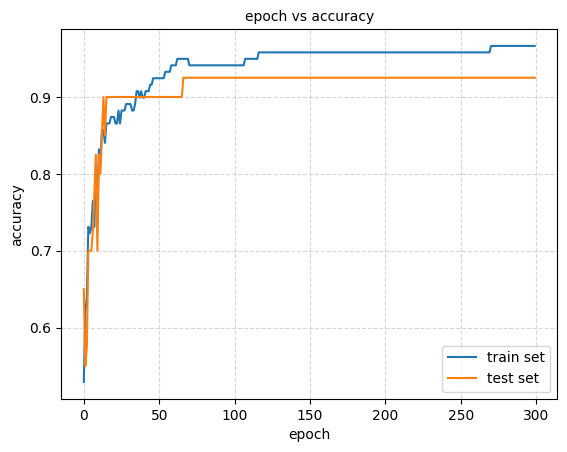

In [13]:
import matplotlib.pyplot as plt

#그래프 그리기
plt.plot(train_score, label = 'train set')
plt.plot(test_score, label = 'test set')
plt.xlabel('epoch')
plt.ylabel('accuracy')

# 제목 설정
plt.title('epoch vs accuracy', fontsize=10)

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [18]:
sc = SGDClassifier(loss = 'log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [19]:
sc = SGDClassifier(loss = 'hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
